# Simple Linear Regression

## LinearRegression() method

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("./data_pd/Diamonds Prices2022.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# import seaborn as sns
# from sklearn.datasets import fetch_california_housing
# data = fetch_california_housing(as_frame=True)
# df = data.frame

# X = df[['MedInc']].values
# y = df['MedHouseVal'].values

In [6]:
# Extract relevant columns
X = df[['carat']].values    # Predictor
y = df['price'].values    # Target


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make prediction on the test set
y_pred = model.predict(X_test)


In [10]:
# Metrics and Interpretation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [11]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 7751.989281984766
 Intercept: -2247.4241678814396

Model Performance Metrics:
 Mean Squared Error (MSE): 2315697.6330710365
 Root Mean Squared Error (RMSE): 1521.7416446529405
 R^2 Score (Explained Variance): 0.8516827702293546


In [12]:
# Print Predicted vs actual values for the test set
print("\nPredicted vs Acual Prices (Test Set):")
for actual, predicted in zip(y_test, y_pred):
    print(f" Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Predicted vs Acual Prices (Test Set):
 Actual: 559.00, Predicted: -386.95
 Actual: 8403.00, Predicted: 7132.48
 Actual: 1238.00, Predicted: 1628.57
 Actual: 1243.00, Predicted: 1628.57
 Actual: 6901.00, Predicted: 9768.16
 Actual: 3011.00, Predicted: 5504.57
 Actual: 1766.00, Predicted: 1706.09
 Actual: 12958.00, Predicted: 9535.60
 Actual: 2103.00, Predicted: 2171.21
 Actual: 4789.00, Predicted: 6589.84
 Actual: 14618.00, Predicted: 9380.56
 Actual: 702.00, Predicted: 233.21
 Actual: 958.00, Predicted: 155.69
 Actual: 2401.00, Predicted: 3178.97
 Actual: 1149.00, Predicted: 2481.29
 Actual: 961.00, Predicted: 930.89
 Actual: 2958.00, Predicted: 5349.53
 Actual: 666.00, Predicted: 310.73
 Actual: 2665.00, Predicted: 3721.61
 Actual: 9875.00, Predicted: 9923.20
 Actual: 1020.00, Predicted: 233.21
 Actual: 2553.00, Predicted: 3178.97
 Actual: 625.00, Predicted: 155.69
 Actual: 10367.00, Predicted: 7054.96
 Actual: 3854.00, Predicted: 4806.89
 Actual: 1415.00, Predicted: 1628.57
 Actual:

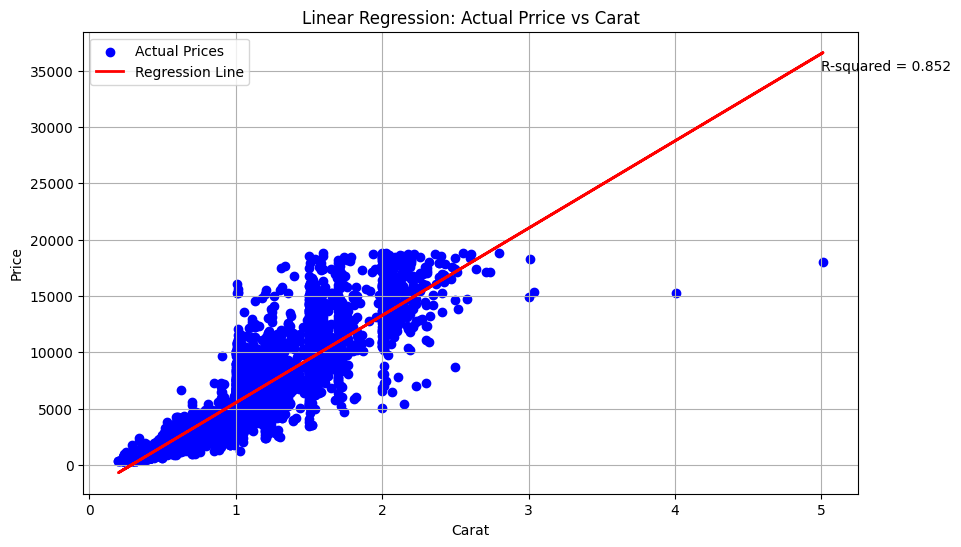

In [13]:
# Plot the linear Regression line and actual values
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Linear Regression: Actual Prrice vs Carat")
plt.annotate("R-squared = {:.3f}".format(r2_score(y_test, y_pred)), (5, 35000))
plt.legend()
plt.grid()
plt.show()

## OLS() Ordinary Least Squares regression Method

In [14]:
import statsmodels.api as sm

In [15]:
# Add a constant to the predictor for the intercept term
X = sm.add_constant(X)

In [16]:
# Fit the OLS regression model
ols_model = sm.OLS(y_train, X_train).fit()

In [17]:
# Print the summary of the OLS regression
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          3.212e+05
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                        0.00
Time:                        10:57:49   Log-Likelihood:                     -3.8778e+05
No. Observations:               43154   AIC:                                  7.756e+05
Df Residuals:                   43153   BIC:                                  7.756e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
# Make prediction on the test set
y_pred = ols_model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error and R-squared manually for the test data


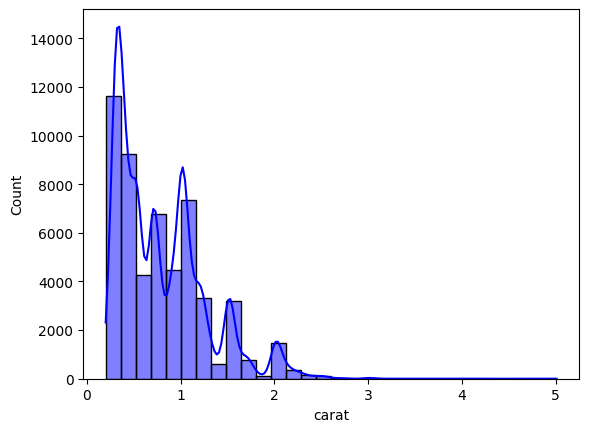

In [20]:
import seaborn as sns
sns.histplot(df['carat'], bins=30, kde=True, color='blue')
plt.show()

# Multiple Linear Regression
    - included the scaling and encoding

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.read_csv("./data_pd/insurance.csv")


In [ ]:
# # One hot encoding the gender column
# df = pd.get_dummies(df, columns=['gender'], drop_first=True)
# df.head()

# # Label Encode the gender column
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['gender'] = le.fit_transform(df['gender'])       # Encode gender as 0 and 1
# df.head()

# # Frequency Encoding
# gender_counts = df['gender'].value_counts(normalize=True)       # Calculate frequency
# gender_counts
# df['gender']  =df['gender'].map(gender_counts)      # Replace category with frequency
# df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0.494768,27.900,0,yes,southwest,16884.92400
1,18,0.505232,33.770,1,no,southeast,1725.55230
2,28,0.505232,33.000,3,no,southeast,4449.46200
3,33,0.505232,22.705,0,no,northwest,21984.47061
4,32,0.505232,28.880,0,no,northwest,3866.85520


In [ ]:
# # Extract relevant columns
# X = df[['age', 'bmi']].values
# y = df['charges'].values
# X

# # Extract relevant columns
# X = df[['age', 'bmi', 'gender_male']].values      # "gender_male" will be formed after one hot encoding the gender column
# y = df['charges'].values
# X

array([[19.  , 27.9 ],
       [18.  , 33.77],
       [28.  , 33.  ],
       ...,
       [18.  , 36.85],
       [21.  , 25.8 ],
       [61.  , 29.07]])

In [37]:
# # Apply StandardScaler to the predictors
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# print(X_scaled)

# Apply MinMaxScaler to the predictors
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.02173913 0.3212268 ]
 [0.         0.47914985]
 [0.2173913  0.45843422]
 ...
 [0.         0.56201238]
 [0.06521739 0.26472962]
 [0.93478261 0.35270379]]


In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [26]:
# Fit the linear regresion model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
# Make preditction on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [30]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 223.79653146380315
 Intercept: -5571.083408548651

Model Performance Metrics:
 Mean Squared Error (MSE): 131440262.76073726
 Root Mean Squared Error (RMSE): 11464.739977894713
 R^2 Score (Explained Variance): 0.1533569292467798


In [31]:
# Print Predicted vs actual values for the test set
print("\nPredicted vs Acual Prices (Test Set):")
for actual, predicted in zip(y_test, y_pred):
    print(f" Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Predicted vs Acual Prices (Test Set):
 Actual: 9095.07, Predicted: 12827.51
 Actual: 5272.18, Predicted: 12416.04
 Actual: 29330.98, Predicted: 17645.30
 Actual: 9301.89, Predicted: 13239.86
 Actual: 33750.29, Predicted: 9240.01
 Actual: 4536.26, Predicted: 16229.08
 Actual: 2117.34, Predicted: 6128.89
 Actual: 14210.54, Predicted: 21290.66
 Actual: 3732.63, Predicted: 6414.66
 Actual: 10264.44, Predicted: 14885.44
 Actual: 18259.22, Predicted: 9214.20
 Actual: 7256.72, Predicted: 13723.58
 Actual: 3947.41, Predicted: 10707.22
 Actual: 46151.12, Predicted: 18732.70
 Actual: 48673.56, Predicted: 21392.82
 Actual: 44202.65, Predicted: 17828.49
 Actual: 9800.89, Predicted: 19513.26
 Actual: 42969.85, Predicted: 17064.36
 Actual: 8233.10, Predicted: 14002.34
 Actual: 21774.32, Predicted: 12945.58
 Actual: 5080.10, Predicted: 7929.82
 Actual: 7441.50, Predicted: 14836.07
 Actual: 1256.30, Predicted: 8737.20
 Actual: 2755.02, Predicted: 12519.71
 Actual: 11085.59, Predicted: 14920.68
 Actua

# Exercise on Linear Regression

## indian_housing_pune dataset

- Q. Perform Simple Linear regression on indian_housing_pune dataset between house size and price columns

In [45]:
housing_df = pd.read_csv("./data_pd/Indian_housing_Pune_data.csv")
housing_df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906 sq ft,Lohegaon,Pune,18.605820,73.912407,12000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
1,1 BHK Apartment,650 sq ft,Anand Nagar,Pune,18.474377,73.820549,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,It has a built-up area of 650 sqft and is avai...,No Deposit,Semi-Furnished
2,1 RK Studio Apartment,350 sq ft,Wagholi,Pune,18.580336,73.980507,4500,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,This spacious 1 rk independent house is availa...,No Deposit,Unfurnished
3,3 BHK Apartment,"1,500 sq ft",Sangamvadi,Pune,18.541786,73.882454,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,"Furnishings include 1 tv, 1 refrigerator, 1 so...",No Deposit,Furnished
4,5 BHK Independent House,"5,000 sq ft",Wadgaon Sheri,Pune,18.560164,73.924927,110000,INR,5.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 5 bhk independent house situated in W...,No Deposit,Unfurnished


In [49]:
housing_df['house_size'] = housing_df['house_size'].str.replace(" sq ft", "")
housing_df['house_size'] = housing_df['house_size'].str.replace(",", "").astype(int)

In [50]:
# Extract relevant columns
X = housing_df[['house_size']].values    # Predictor
y = housing_df['price'].values    # Target


In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make prediction on the test set
y_pred = model.predict(X_test)
# Metrics and Interpretation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 25.895940043649098
 Intercept: -4530.245496776624

Model Performance Metrics:
 Mean Squared Error (MSE): 146703158.61478436
 Root Mean Squared Error (RMSE): 12112.10793440945
 R^2 Score (Explained Variance): 0.41769537139188684


In [53]:
# Print Predicted vs actual values for the test set
print("\nPredicted vs Acual Prices (Test Set):")
for actual, predicted in zip(y_test, y_pred):
    print(f" Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Predicted vs Acual Prices (Test Set):
 Actual: 17000.00, Predicted: 30636.44
 Actual: 12500.00, Predicted: 13596.91
 Actual: 45000.00, Predicted: 31724.07
 Actual: 13000.00, Predicted: 13078.99
 Actual: 9000.00, Predicted: 13130.79
 Actual: 23000.00, Predicted: 24473.21
 Actual: 22000.00, Predicted: 26026.96
 Actual: 27000.00, Predicted: 25431.36
 Actual: 100000.00, Predicted: 70567.98
 Actual: 25000.00, Predicted: 38301.64
 Actual: 20000.00, Predicted: 19397.60
 Actual: 25000.00, Predicted: 30066.73
 Actual: 7000.00, Predicted: 18776.10
 Actual: 15000.00, Predicted: 13337.95
 Actual: 29000.00, Predicted: 21365.69
 Actual: 25000.00, Predicted: 17481.30
 Actual: 13000.00, Predicted: 8417.72
 Actual: 75000.00, Predicted: 65388.79
 Actual: 15000.00, Predicted: 27943.26
 Actual: 16000.00, Predicted: 13078.99
 Actual: 22000.00, Predicted: 9712.52
 Actual: 13000.00, Predicted: 10178.65
 Actual: 27000.00, Predicted: 10230.44
 Actual: 15000.00, Predicted: 24343.73
 Actual: 18500.00, Predicted

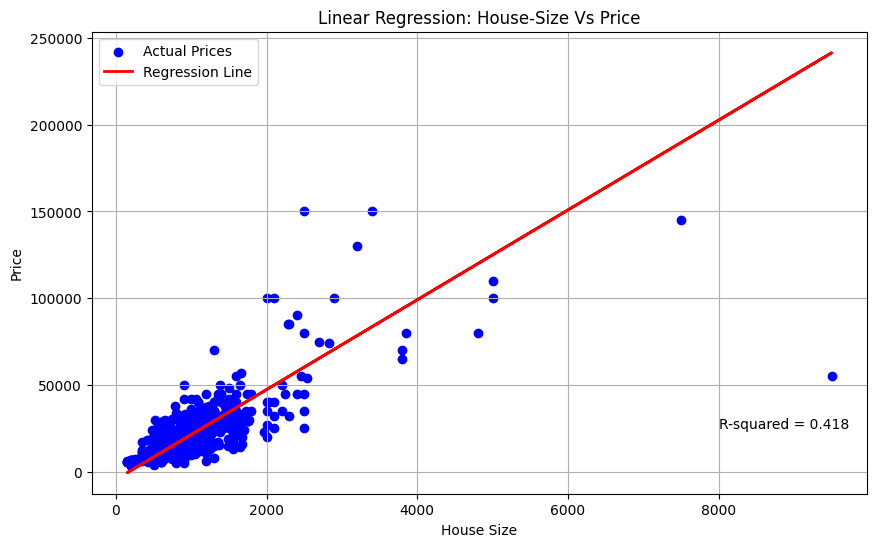

In [55]:
# Plot the linear Regression line and actual values
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("Linear Regression: House-Size Vs Price")
plt.annotate("R-squared = {:.3f}".format(r2_score(y_test, y_pred)), (8000, 25000))
plt.legend()
plt.grid()
plt.show()

## Advertising dataset

- Q. Perform Multiple linear regression on advertising dataset to predict sales using money spent on TV, radio, newspaper advertising

In [57]:
advertise_df = pd.read_csv("./data_pd/advertising.csv")
advertise_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [58]:
# Extract relevant columns
X = advertise_df[['TV', 'Radio', 'Newspaper']].values    # Predictor
y = advertise_df['Sales'].values    # Target


In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make prediction on the test set
y_pred = model.predict(X_test)
# Metrics and Interpretation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [60]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 0.044729517468716326
 Intercept: 2.979067338122631

Model Performance Metrics:
 Mean Squared Error (MSE): 3.174097353976104
 Root Mean Squared Error (RMSE): 1.7815996615334502
 R^2 Score (Explained Variance): 0.899438024100912


## Tips dataset

- Q. Perform multiple linear regression on tips dataset. Use total bill, smoker, and day as predictors and tip as the predicted value. Use any one encoding method to encode the smoker and day columns before pr=erforming the regression operation

In [83]:
tips_df = pd.read_csv("./data_pd/tips.csv")
tips_df.head()
tips_df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [84]:
tips_df = tips_df[['total_bill', 'smoker','day','tip']]

In [85]:
# One hot encoding the gender column
tips_df = pd.get_dummies(tips_df, columns=['smoker','day'], drop_first=True)

tips_df.head()


,total_bill,tip,smoker_Yes,day_Sat,day_Sun,day_Thur
0,16.99,1.01,False,False,True,False
1,10.34,1.66,False,False,True,False
2,21.01,3.50,False,False,True,False
3,23.68,3.31,False,False,True,False
4,24.59,3.61,False,False,True,False


In [87]:
# Extract relevant columns
X = tips_df.drop(columns='tip').values      
y = tips_df['tip'].values
X

array([[16.99, False, False, True, False],
       [10.34, False, False, True, False],
       [21.01, False, False, True, False],
       ...,
       [22.67, True, True, False, False],
       [17.82, False, True, False, False],
       [18.78, False, False, False, True]], dtype=object)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
# Fit the linear regresion model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Make preditction on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [99]:
print("Model Coefficients : ")
print(f" Slope (Coefficient for carat): {model.coef_[0]}")
print(f" Intercept: {model.intercept_}")
print(f"\nModel Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R^2 Score (Explained Variance): {r2}")

Model Coefficients : 
 Slope (Coefficient for carat): 0.1089049387479865
 Intercept: 1.0733476527583186

Model Performance Metrics:
 Mean Squared Error (MSE): 0.6475620146605893
 Root Mean Squared Error (RMSE): 0.8047123800840827
 R^2 Score (Explained Variance): 0.4819385123430485


# Logistic Regression

## Diabetes Dataset

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [109]:
df = pd.read_csv("./data_pd/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [209]:
# Split the dataset into predictor variable X and the target variable y
X = df.drop("Outcome", axis=1)
y = df['Outcome']

In [210]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

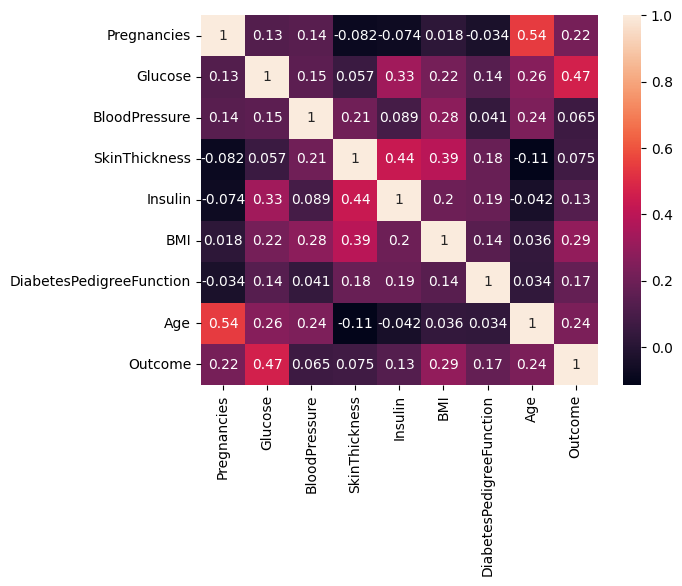

In [213]:
sns.heatmap(df.corr(), annot=True)

In [111]:
# Split data into training ad testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [112]:
# Create and train a logistic regression model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [113]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)


In [116]:
# Display prediction comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
comparison.head()

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


In [117]:
# Print Accuracy Score
print(f"Test Accuracy: {accuracy_score(y_test, y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_prediction):.4f}")

Test Accuracy: 0.7749
Train Accuracy: 0.7747


In [118]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix")
conf_mat


Confusion Matrix


array([[132,  14],
       [ 38,  47]], dtype=int64)

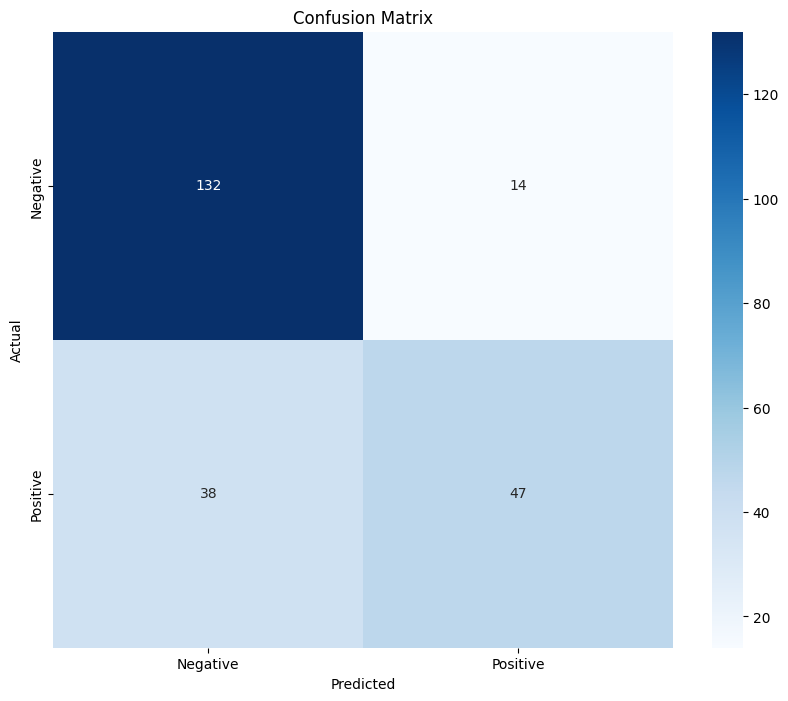

In [ ]:

# Visualize confusion matrix using a Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [129]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [136]:
# Calcuate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP / (TP+FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP +FN +TN)

print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.5529
precision: 0.7705
Specificity: 0.9041
Accuracy: 0.7749


In [137]:
# Another Technique
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Extract TP ,TN, FP, FN from the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

# Calcualte accuracy, precision, recall and F1 score
accuracy = accuracy_score(y_test, y_test_prediction)
precision = precision_score(y_test, y_test_prediction)
recall = recall_score(y_test, y_test_prediction)
f1 = f1_score(y_test, y_test_prediction)

# Print the results
print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Recall: 0.5529
precision: 0.7705
Recall: 0.5529
F1-Score: 0.6438


## Titanic Dataset

In [139]:
titanic_df = pd.read_csv("./data_pd/tested.xls")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# titanic_df['Age'].unique()
titanic_df['Age'].dropna()
titanic_df = titanic_df.dropna(subset=['Age'])

In [ ]:
titanic_df['Age'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,  26.    ,  82.2667,
        61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,  59.4   ,
         3.1708,  61.3792, 262.375 ,  14.5   ,  61.9792,  30.5   ,
        31.5   ,  20.575 ,  57.75  ,   9.5   ,  13.4167,   7.85  ,
        13.    ,  52.5542,  29.7   ,  76.2917,  15.9   ,  60.    ,
        15.0333,  23.    , 263.    ,  29.125 ,   7.8958,   7.65  ,
        13.5   ,   7.75  ,   7.725 ,   7.8792,  42.4   ,  28.5375,
       211.5   ,  25.7   ,  15.2458, 221.7792,   8.05  ,  13.9   ,
        52.    ,   7.7958,  78.85  ,   7.8542,  55.4417,   7.775 ,
         8.5167,  22.525 ,   7.8208,  15.0458,  31.6792,   7.2833,
        14.4542,  16.7   ,  75.2417,  15.75  ,   7.25  ,  16.1   ,
        28.5   ,  46.9   , 151.55  ,  26.55  ,  18.    ,  83.1583,
        12.1833,  31.3875,   7.55  ,  13.775 ,  22.025 ,  50.4958,
        34.375 ,   8.9625,  39.    ,  36.75  ,  53.1   , 247.5

In [ ]:
# Split the dataset into predictor variable X and the target variable y
X = titanic_df[['Age']]
y = titanic_df['Survived']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)


In [221]:
# Create and train a logistic regression model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [222]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)

In [223]:
# Display prediction comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
comparison.head()

,Actual,Predicted
186,1,0
185,0,0
194,0,0
405,0,0
131,0,0


In [224]:
# Print Accuracy Score
print(f"Test Accuracy: {accuracy_score(y_test, y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_prediction):.4f}")

Test Accuracy: 0.6269
Train Accuracy: 0.6326


In [225]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix")
conf_mat


Confusion Matrix


array([[38,  3],
       [22,  4]], dtype=int64)

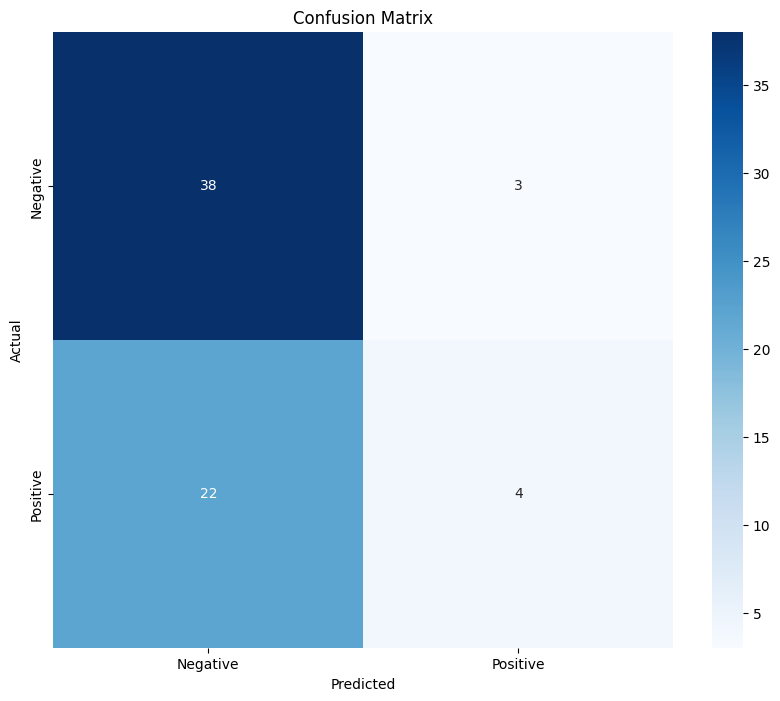

In [226]:
# Visualize confusion matrix using a Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [227]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75        41
           1       0.57      0.15      0.24        26

    accuracy                           0.63        67
   macro avg       0.60      0.54      0.50        67
weighted avg       0.61      0.63      0.55        67



In [228]:
# Calcuate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP / (TP+FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP +FN +TN)

print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.1538
precision: 0.5714
Specificity: 0.9268
Accuracy: 0.6269


<Axes: >

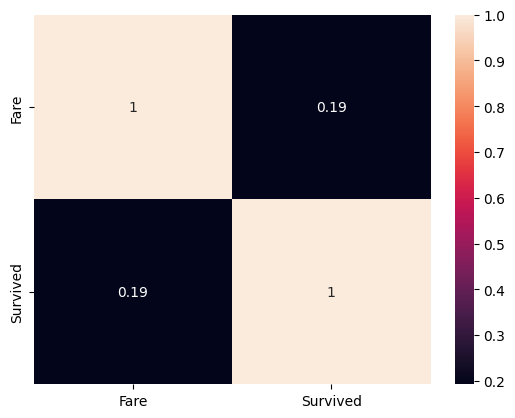

In [230]:
sns.heatmap(titanic_df[['Fare', 'Survived']].corr(), annot=True)

# Naive Bayes Classifier


## Titanic Dataset
    - Find who survived given that they were female and their passenger class was 3 using naive bayes algorithm
    - Bayes Theorem: P(survived | pclass=3, gender =female) = P(pclass=3, gender=female | survived) * P(survived) / P(pcalss=3, gender=female)

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv("./data_pd/tested.xls")

In [ ]:
# One hot encode the gender column
df = pd.get_dummies(df, columns=['Sex'])

# Now the 'Sex' column will be replaced with two new columns:
# Sex_male and Sex_female

In [235]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,True,False
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,False,True
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,True,False


In [236]:
X = df[['Pclass', 'Sex_female']]
y = df['Survived']

In [237]:
# Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [239]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

In [240]:
# Print the result dataframe
results

,Actual,Prediction
321,0,0
324,1,1
388,0,0
56,0,0
153,1,1
...,...,...
57,0,0
126,0,0
24,1,1
17,0,0


In [241]:
# Calculate Accuracy score (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [ ]:
# Predict the probability of survival for a female passenger in class 3 
new_passenger = [[3,1]]     # 3 for pclass and 1 for gender == female i.e true
predicted_probability = nb.predict_proba(new_passenger)[0][1]

# It might return [0.3,0.7]
# [p(did not survive), p(survived)]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [246]:
# evaluate the model with confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
conf_matrix


Confusion Matrix


array([[50,  0],
       [ 0, 34]], dtype=int64)

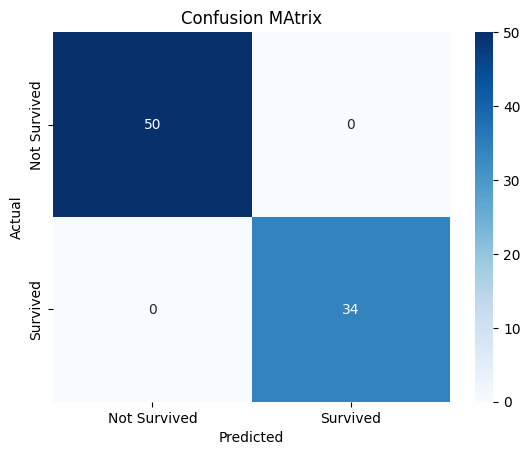

In [247]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion MAtrix')
plt.show()

In [249]:
# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print("\n Classification Report")
class_report


 Classification Report


'              precision    recall  f1-score   support\n\nNot Survived       1.00      1.00      1.00        50\n    Survived       1.00      1.00      1.00        34\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

## Heart Dataset

    - Do Naive Bayes classification for the Heart.csv dataset to predict if the patient has heart disease. Evaluate the model's accuracy using results on the test set and using confusion matrix. 
    Predict for a patient having 
    Age = 50, 
    Gender = Male, 
    Resting BP = 150 
    Cholestrol =200, 
    MaxHR = 130. 
    Use only these columns as a predicting features.
    Then perform same using Logistic regression and compare results 

In [251]:
heart_df = pd.read_csv('./data_pd/Heart2.csv')
heart_df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [252]:
# One hot encode the gender column
heart_df = pd.get_dummies(heart_df, columns=['Gender'])
heart_df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_F,Gender_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,False,True
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True,False
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,False,True
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True,False
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,False,True


In [253]:
X = heart_df[['Age', 'Gender_M', 'RestingBP', 'Cholesterol', 'MaxHR']]
y = heart_df['HeartDisease']

In [254]:
# Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [257]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

,Actual,Prediction
668,0,0
30,1,1
377,1,1
535,1,1
807,0,0
...,...,...
211,1,0
745,1,0
584,1,1
878,0,0


In [ ]:

# Calculate Accuracy score (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7283


In [264]:
# Predict the probability of Heart Disease for a male patient 
new_patient = [[50,True, 150, 200, 130]]     
predicted_probability = nb.predict_proba(new_patient)[0][1]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [265]:
predicted_probability

0.6797579278467842

In [266]:
# evaluate the model with confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
conf_matrix


Confusion Matrix


array([[53, 24],
       [26, 81]], dtype=int64)

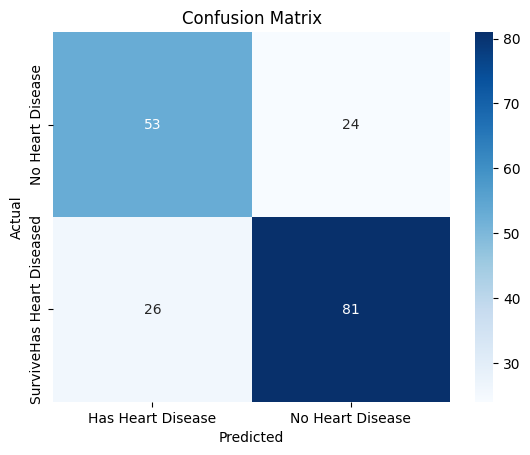

In [ ]:

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Has Heart Disease', 'No Heart Disease'], yticklabels=['No Heart Disease', 'SurviveHas Heart Diseased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [279]:
# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Has Heart Disease'])
print("\n Classification Report")
print(class_report)


 Classification Report
                   precision    recall  f1-score   support

 No Heart Disease       0.67      0.69      0.68        77
Has Heart Disease       0.77      0.76      0.76       107

         accuracy                           0.73       184
        macro avg       0.72      0.72      0.72       184
     weighted avg       0.73      0.73      0.73       184



    - now using Logistic regression

In [269]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [270]:
# Make predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train)

In [271]:
# Display prediction comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_prediction})
comparison.head()

,Actual,Predicted
668,0,0
30,1,0
377,1,1
535,1,1
807,0,0


In [272]:
# Print Accuracy Score
print(f"Test Accuracy: {accuracy_score(y_test, y_test_prediction):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_prediction):.4f}")

Test Accuracy: 0.7011
Train Accuracy: 0.7316


In [273]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_test_prediction)
print("\nConfusion Matrix")
conf_mat



Confusion Matrix


array([[51, 26],
       [29, 78]], dtype=int64)

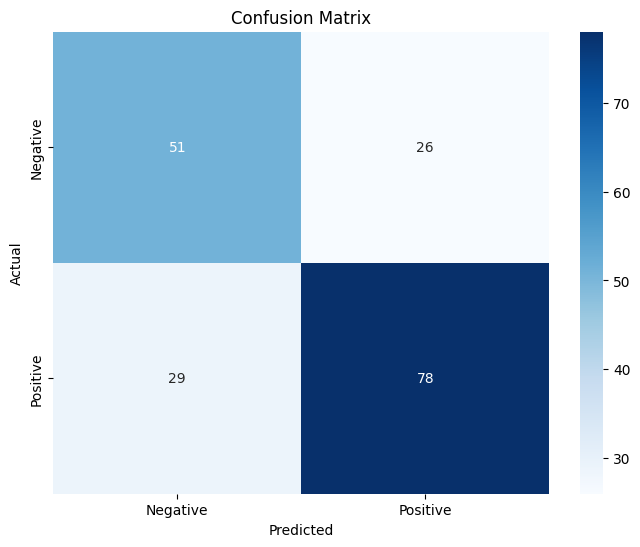

In [275]:
# Visualize confusion matrix using a Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [276]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        77
           1       0.75      0.73      0.74       107

    accuracy                           0.70       184
   macro avg       0.69      0.70      0.69       184
weighted avg       0.70      0.70      0.70       184



In [277]:
# Calcuate additional metrics
TN, FP, FN, TP = conf_mat.ravel()
recall = TP / (TP+FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP +FN +TN)

print(f"Recall: {recall:.4f}")
print(f"precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Recall: 0.7290
precision: 0.7500
Specificity: 0.6623
Accuracy: 0.7011


## Cricket Dataset

    - Use naive Bayes to find the probability of India winning the next match against Australia when playing abroad

In [350]:
df1 = pd.read_csv("./data_pd/Men ODI Team Match Results2 - 20th Century.csv")
df2 = pd.read_csv("./data_pd/Men ODI Team Match Results2 - 21st Century.csv")
cricket_df = pd.concat([df1, df2])

In [285]:
cricket_df.tail()

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
5165,Lost,3 wickets,Afghanistan v Pakistan,Home,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan
5166,Lost,23 runs,Afghanistan v West Indies,Home,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan
5167,Lost,7 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan
5168,Lost,47 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan
5169,Lost,5 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/11,Nov,2019,Nov 2019,1,Afghanistan


In [301]:
cricket_df['Result'].value_counts()

Result
Won     3999
Lost    3908
N/R      291
Aban     207
Tied      76
Canc      60
Name: count, dtype: int64

In [302]:
cricket_df['Result'] = cricket_df['Result'].map(lambda x: 'Won' if x == 'Won' else 'Lost')
cricket_df['Result'].value_counts()

Result
Lost    4542
Won     3999
Name: count, dtype: int64

In [303]:
filtered_df = cricket_df[cricket_df['Match'].str.contains('India', case=False) & cricket_df['Match'].str.contains('Australia', case=False)]
filtered_df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
368,Lost,66 runs,Australia v India,Home,Melbourne,1980/12/06,Dec,1980,Dec 1980,1,Australia
370,Won,9 wickets,Australia v India,Home,Sydney,1980/12/18,Dec,1980,Dec 1980,1,Australia
371,Won,9 wickets,Australia v India,Home,Sydney,1981/01/08,Jan,1981,Jan 1981,1,Australia
372,Won,7 wickets,Australia v India,Home,Melbourne,1981/01/11,Jan,1981,Jan 1981,1,Australia
374,Won,27 runs,Australia v India,Home,Sydney,1981/01/15,Jan,1981,Jan 1981,1,Australia
...,...,...,...,...,...,...,...,...,...,...,...
2745,Lost,35 runs,India v Australia,Home,Delhi,2019/03/13,Mar,2019,Mar 2019,1,India
2747,Won,36 runs,Australia v India,Away,The Oval,2019/06/09,Jun,2019,Jun 2019,1,India
2762,Lost,10 wickets,India v Australia,Home,Mumbai,2020/01/14,Jan,2020,Jan 2020,1,India
2763,Won,36 runs,India v Australia,Home,Rajkot,2020/01/17,Jan,2020,Jan 2020,1,India


In [304]:
filtered_df = pd.get_dummies(filtered_df, columns=['Home/Away'])

In [305]:
filtered_df.head()

,Result,Margin,Match,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,Home/Away_Away,Home/Away_Home
368,Lost,66 runs,Australia v India,Melbourne,1980/12/06,Dec,1980,Dec 1980,1,Australia,False,True
370,Won,9 wickets,Australia v India,Sydney,1980/12/18,Dec,1980,Dec 1980,1,Australia,False,True
371,Won,9 wickets,Australia v India,Sydney,1981/01/08,Jan,1981,Jan 1981,1,Australia,False,True
372,Won,7 wickets,Australia v India,Melbourne,1981/01/11,Jan,1981,Jan 1981,1,Australia,False,True
374,Won,27 runs,Australia v India,Sydney,1981/01/15,Jan,1981,Jan 1981,1,Australia,False,True


In [306]:
# # Label Encode the gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
filtered_df['Result'] = le.fit_transform(filtered_df['Result'])       # Encode gender as 0 and 1
filtered_df.head()

,Result,Margin,Match,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,Home/Away_Away,Home/Away_Home
368,0,66 runs,Australia v India,Melbourne,1980/12/06,Dec,1980,Dec 1980,1,Australia,False,True
370,1,9 wickets,Australia v India,Sydney,1980/12/18,Dec,1980,Dec 1980,1,Australia,False,True
371,1,9 wickets,Australia v India,Sydney,1981/01/08,Jan,1981,Jan 1981,1,Australia,False,True
372,1,7 wickets,Australia v India,Melbourne,1981/01/11,Jan,1981,Jan 1981,1,Australia,False,True
374,1,27 runs,Australia v India,Sydney,1981/01/15,Jan,1981,Jan 1981,1,Australia,False,True


In [307]:
filtered_df['Result'].value_counts()

Result
0    160
1    130
Name: count, dtype: int64

In [308]:
X = filtered_df[['Home/Away_Away']]
y = filtered_df['Result']

In [309]:
# Split the data into training and tetsing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [ ]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

,Actual,Prediction
1905,1,1
2608,0,1
690,0,0
762,1,1
544,0,1
2263,1,0
2314,0,0
2219,0,0
445,0,0
1926,1,0


In [312]:
# Calculate Accuracy score (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5690


In [313]:
# Predict the probability of winning abroad vs Australia 
new_match = [[True]]     
predicted_probability = nb.predict_proba(new_match)[0][1]

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [314]:
predicted_probability

0.3697625475575165

In [315]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
conf_matrix




Confusion Matrix


array([[23, 13],
       [12, 10]], dtype=int64)

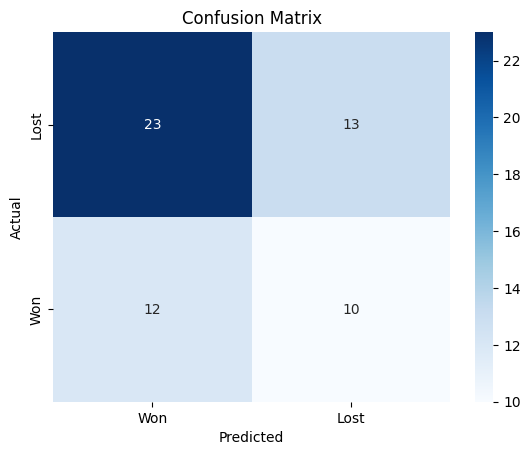

In [316]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Won', 'Lost'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [317]:
class_report = classification_report(y_test, y_pred, target_names=['Lost', 'Won'])
print("\n Classification Report")
print(class_report)


 Classification Report
              precision    recall  f1-score   support

        Lost       0.66      0.64      0.65        36
         Won       0.43      0.45      0.44        22

    accuracy                           0.57        58
   macro avg       0.55      0.55      0.55        58
weighted avg       0.57      0.57      0.57        58



## Cricket Dataset (Another Method)

In [351]:
cricket_df = cricket_df.dropna()
cricket_df.tail()

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
5165,Lost,3 wickets,Afghanistan v Pakistan,Home,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan
5166,Lost,23 runs,Afghanistan v West Indies,Home,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan
5167,Lost,7 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan
5168,Lost,47 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan
5169,Lost,5 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/11,Nov,2019,Nov 2019,1,Afghanistan


In [352]:
# We do not want to remove duplicates, because eng v aus shoul also appear as aus v eng
#cricket_df = cricket_df.drop_duplicates(subset=['Ground', 'Match Date'])
cricket_df.shape

(8522, 11)

In [353]:
# Splitting the match column into team and opposition
cricket_df['team'] = cricket_df['Match'].apply(lambda x: x.split(' v ')[0])
cricket_df['opposition'] = cricket_df['Match'].apply(lambda x: x.split(' v ')[1])
cricket_df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,team,opposition
0,Lost,5 wickets,Australia v England,Away,Melbourne,1971/01/05,Jan,1971,Jan 1971,1,England,Australia,England
1,Won,6 wickets,England v Australia,Home,Manchester,1972/08/24,Aug,1972,Aug 1972,1,England,England,Australia
2,Lost,5 wickets,England v Australia,Home,Lord's,1972/08/26,Aug,1972,Aug 1972,1,England,England,Australia
3,Won,2 wickets,England v Australia,Home,Birmingham,1972/08/28,Aug,1972,Aug 1972,1,England,England,Australia
4,Won,7 wickets,England v New Zealand,Home,Swansea,1973/07/18,Jul,1973,Jul 1973,1,England,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,Lost,3 wickets,Afghanistan v Pakistan,Home,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan,Afghanistan,Pakistan
5166,Lost,23 runs,Afghanistan v West Indies,Home,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan,Afghanistan,West Indies
5167,Lost,7 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies
5168,Lost,47 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies


In [354]:
# Keep only Won/Lost
cricket_df = cricket_df[(cricket_df['Result'] == 'Won') | (cricket_df['Result'] == 'Lost')]
print(cricket_df.shape)

(7888, 13)


In [355]:
# Mapping Lost to 0 and Won to 1
cricket_df['Result'] = cricket_df['Result'].map({'Lost': 0, 'Won': 1})
cricket_df['Home/Away'] = cricket_df['Home/Away'].map({'Away' : 0, 'Home': 1})

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_15036\3278458891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket_df['Result'] = cricket_df['Result'].map({'Lost': 0, 'Won': 1})
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_15036\3278458891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket_df['Home/Away'] = cricket_df['Home/Away'].map({'Away' : 0, 'Home': 1})


In [356]:
# Country filter India
cricket_df = cricket_df[(cricket_df['team'] == 'India')]

In [357]:
cricket_df.Ground

61             Ahmedabad
62             Jalandhar
63               Cuttack
98                  Pune
99               Cuttack
              ...       
4625              Durban
4629         Southampton
4731    Pietermaritzburg
4811           Bengaluru
4848            Hamilton
Name: Ground, Length: 1124, dtype: object

In [360]:
# One Hot encode the opposition column
opposition_encoded = pd.get_dummies(cricket_df['opposition'], prefix='opposition')
print(opposition_encoded)

      opposition_Australia  opposition_Bangladesh  opposition_England  \
61                   False                  False                True   
62                   False                  False                True   
63                   False                  False                True   
98                   False                  False                True   
99                   False                  False                True   
...                    ...                    ...                 ...   
4625                 False                  False               False   
4629                 False                  False               False   
4731                 False                  False               False   
4811                 False                  False               False   
4848                 False                  False               False   

      opposition_Ireland  opposition_Kenya  opposition_Namibia  \
61                 False             False               

In [361]:
# Combine one hot encoded opposition with Home/Away col
X = pd.concat([opposition_encoded, pd.get_dummies(cricket_df['Home/Away'], drop_first=True)], axis=1)
y = cricket_df['Result']

In [365]:
X

,opposition_Australia,opposition_Bangladesh,opposition_England,opposition_Ireland,opposition_Kenya,opposition_Namibia,opposition_Netherlands,opposition_New Zealand,opposition_Pakistan,opposition_South Africa,opposition_Sri Lanka,opposition_U.A.E.,opposition_West Indies,opposition_Zimbabwe,1
61,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
62,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4629,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4731,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4811,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [362]:
# Ensure that the column names in X are string
X.columns = X.columns.astype(str)

In [363]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [364]:
# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make the predictioon on the test data
y_pred = nb.predict(X_test)

In [366]:
# Create a dataframe to show predictions and actual values
results = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
results

,Actual,Prediction
3593,1,0
2515,1,1
2144,0,0
1774,1,0
3059,0,0
...,...,...
1089,1,0
2109,1,1
2267,1,0
214,1,1


In [367]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4800


In [371]:
len(X.columns)

15

In [374]:
new_match = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]     
predicted_probability = nb.predict_proba(new_match)[0][1]
predicted_probability

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.6607737984961627